Airbnb is a very popular home-sharing site that takes a unique approach by offering someones's home as a place to stay for travelers from everywhere instead of traditional hotels.

in this assignment we were asked to analyise the data and come up with recommendations for an inevstor that is interested in purchasing/building a property in one of the tourist towns near great nature. 

q: 
1. what 
2. what is area is the most expensive?

recommendations:


In [2]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels as sm 

In [4]:
# importing the data of Canada
df=pd.read_csv('../data/canada/listings.csv')

In [5]:
# data exploration
# overview:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13621 entries, 0 to 13620
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              13621 non-null  int64  
 1   name                            13617 non-null  object 
 2   host_id                         13621 non-null  int64  
 3   host_name                       13620 non-null  object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   13621 non-null  object 
 6   latitude                        13621 non-null  float64
 7   longitude                       13621 non-null  float64
 8   room_type                       13621 non-null  object 
 9   price                           13621 non-null  int64  
 10  minimum_nights                  13621 non-null  int64  
 11  number_of_reviews               13621 non-null  int64  
 12  last_review                     

In [6]:
# notice that the 'neighbourhood_group' lack any entries and the 'license' bearly have ones
# dropping the mintioned above coulmns 
df.drop(['neighbourhood_group','license'], axis=1, inplace=True)

In [8]:
df.head()

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,298059,Superb cottage Mile-End Plateau !,1536474,Helene,Le Plateau-Mont-Royal,45.52665,-73.60730,Entire home/apt,180,30,52,2014-10-18,0.40,1,104,0
1,2843,Fabulous downtown/airport room,2319,Gail,Le Sud-Ouest,45.48496,-73.58001,Private room,60,30,157,2022-08-21,0.97,2,80,5
2,309367,Charming and Clean ! 5 min Métro,1562348,Virginie,Villeray-Saint-Michel-Parc-Extension,45.55169,-73.60007,Entire home/apt,64,180,22,2015-08-13,0.18,3,74,0
3,29059,Lovely studio Quartier Latin,125031,Maryline,Ville-Marie,45.51939,-73.56482,Entire home/apt,152,2,385,2022-09-02,2.58,2,306,54
4,29061,Maison historique - Quartier Latin,125031,Maryline,Ville-Marie,45.51929,-73.56493,Entire home/apt,286,3,108,2022-08-29,0.84,2,250,27


In [62]:
df.room_type.value_counts()

Entire home/apt    10523
Private room        2991
Shared room           70
Hotel room            37
Name: room_type, dtype: int64

In [9]:
# 1 finding out the prisest kind of property 
price_room = df[['price','room_type']].groupby('room_type').mean()
price_room = price_room.sort_values('price')
print(price_room)
# Entire home/apt are the pricest with average equal to 182.132282 canadian dollar


                      price
room_type                  
Shared room       80.585714
Private room     124.862922
Hotel room       180.027027
Entire home/apt  182.132282


In [60]:
# finding what is the information of the maximum avalable room 
df.iloc[(df['availability_365'].idxmax())]
# 365 is the maximum avalibility

id                                                            190003
name                              Large sunny room HEARTH of plateau
host_id                                                       640693
host_name                                                      Marco
neighbourhood                                  Le Plateau-Mont-Royal
latitude                                                    45.51937
longitude                                                  -73.56999
room_type                                               Private room
price                                                          13294
minimum_nights                                                    99
number_of_reviews                                                  1
last_review                                               2011-08-13
reviews_per_month                                               0.01
calculated_host_listings_count                                     1
availability_365                  

In [44]:
# 2 finding what nigborhood have the highst count of entier home/apt count
price_n = df[['price','neighbourhood']].groupby('neighbourhood').mean()
price_n = price_n.sort_values('price')
print(price_n)
# L'Île-Bizard-Sainte-Geneviève is the pricest neighbourhood with an average equal to 308.717391 canadian dollar

                                               price
neighbourhood                                       
Montréal-Est                               73.000000
Montréal-Ouest                             87.100000
Anjou                                      87.415094
Villeray-Saint-Michel-Parc-Extension       97.604575
Ahuntsic-Cartierville                     110.733042
Verdun                                    113.399317
LaSalle                                   115.560606
Sainte-Anne-de-Bellevue                   117.105263
Beaconsfield                              118.476190
Mont-Royal                                125.173913
Montréal-Nord                             128.672727
Côte-des-Neiges-Notre-Dame-de-Grâce       128.739346
Pointe-Claire                             129.075000
Rosemont-La Petite-Patrie                 132.083485
Saint-Laurent                             135.157609
Saint-Léonard                             137.228070
Mercier-Hochelaga-Maisonneuve             140.

Text(0.5, 1.0, 'room type and price graph')

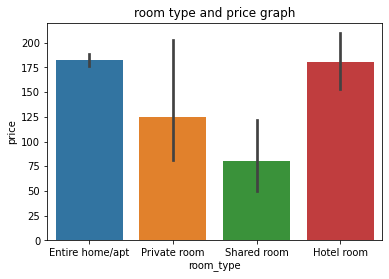

In [54]:
# grapghs:
# 1.1
sns.barplot(x='room_type', y='price',data=df)
plt.title('room type and price graph')


conclusions:
- the entire home/apt are the most high priced places to charge guests as well as the most common type.
- the average price for Entire home/apt is 182.132282 canadian dollar

recommendations:
- investing in Entire home/apt and charging around 182 CD sounds like the idel choice